In [1]:
import numpy as np

In [2]:
elements = ['one', 'two', 'three'] 
weights = [0.2, 0.3, 0.5]  #three가 좀 더 bag에 많이 들어가도록

from numpy.random import choice
print(choice(elements, size=10, replace=True, p=weights))

['three' 'two' 'three' 'one' 'three' 'two' 'two' 'three' 'three' 'one']


In [3]:
X = np.load("./tatanic_X_train.npy")
y = np.load("./tatanic_y_train.npy")

In [4]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [5]:
eclf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=500, #low variance를 위해 depth가 작도록 
                          learning_rate=0.1) #sklearn에서는 learning_rate이라는 람다가 아래 그림 앞에 붙음 #n_estimator가 for문 수(라운드 수) (업데이트를 500번 한다)

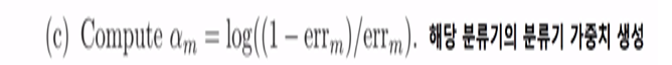

In [18]:
from IPython.display import Image
Image(filename="C:\\Users\\korea\\Desktop\\그림1.png")

In [6]:
from sklearn.model_selection import cross_val_score
cross_val_score(eclf, X, y, cv=5).mean()

0.8177743921792675

In [7]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier()

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [8]:
AdaBoostClassifier()

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [10]:
params = {"base_estimator__criterion" : ["gini", "entropy"],
          "base_estimator__max_features" : [7,8],
          "base_estimator__max_depth" : [1,2],
          "n_estimators": [23,24, 25, 26, 27],
          "learning_rate": [0.4, 0.45, 0.5, 0.55, 0.6]
         }

In [12]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5, n_jobs=-1)
grid = grid.fit(X, y)

In [13]:
grid.best_score_

0.829021372328459

In [14]:
grid.best_params_

{'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': 2,
 'base_estimator__max_features': 8,
 'learning_rate': 0.5,
 'n_estimators': 26}

In [15]:
grid.best_estimator_.feature_importances_  #gini나 entropy가 구해주기 때문에 feature selection에도 용이하다고 했음!

array([0.23186897, 0.20934159, 0.03362239, 0.05282132, 0.03070872,
       0.08405815, 0.02172977, 0.01136866, 0.00564493, 0.00861938,
       0.00427529, 0.        , 0.01657168, 0.08002169, 0.01324372,
       0.0517824 , 0.03206627, 0.01016829, 0.0133003 , 0.        ,
       0.02332303, 0.00145234, 0.03386518, 0.00976908, 0.01447705,
       0.        , 0.00589983])